# *Relu vs Tanh vs Sigmoid* <br> 
 

Remember: **Two inputs**:<br> <br>
**1:M:28×28 matrixes:**  
$$M=\left(\begin{array}{cccc} a_{1,1}& a_{1,2} & \cdots & a_{1,28} \\ a_{2,1} & a_{2,2} & \cdots & a_{2,28} \\ \vdots & \vdots & \ddots & \vdots \\a_{28,1} & a_{28,2}&\cdots & a_{28,28} \end{array} \right)$$ <br> **2:**And a digit **t**: $\left[n\right]$ <br> <br>
The method consists of predicting the digit (from 0 to 9) from M.<br>
First we are going to transform M to a 28×28 row matrix:$\Rightarrow$ 
$M'=\left[ \begin{array}{c} a_{1,1} & \cdots & a_{1,28} &\cdots&\cdots& a_{28,1} &\cdots& a_{28,28}\end{array} \right]$  
<br>The linear model:<br><br>
$$\large Y_{1\times 50}=M'_{1\times 28^2}W_{28^2\times50}+B_{1\times50}$$<br><br>
$$\left[\begin{array}{c} y_{1,1}&y_{1,2}&\cdots&y_{1,50}\end{array}\right]=\left[ \begin{array}{c} a_{1,1} & \cdots & a_{1,28} &\cdots&\cdots& a_{28,1} &\cdots& a_{28,28}\end{array} \right]\left[\begin{array}{cccc} w_{1,1}& w_{1,2} & \cdots & w_{1,50} \\ w_{2,1} & w_{2,2} & \cdots & w_{2,50} \\ \vdots & \vdots & \ddots & \vdots \\w_{28^2,1} & w_{28^2,2}&\cdots & w_{28^2,50} \end{array} \right]+ \left[\begin{array}{c} b_{1,1}&b_{1,2}&\cdots&b_{1,50}\end{array}\right] $$ <br>

Then applying ***Cross Entropy Loss***($\large \sigma$), we transform Y to:<br> 
- **Logistical Function(Sigmoid)**
- **Tanh**
- **Relu**<br>

And choose the cell whose value is the maximum of the components. Finally the cell selected will be compared with **t**<br>
<br>In summary:<br>
$$\large \left( \begin{array}{cccc}
x_1\\ x_2\\ \vdots\\ x_{28\times28}\end {array} \right) \Longrightarrow 
\left(\begin{array}{cccc}
p_1\\ p_2\\ \vdots\\ p_{50}\end {array} \right), \sigma \Longrightarrow
\left(\begin{array}{cccc}
q_1\\ q_2\\ \vdots\\ q_{10}\end {array} \right)\Longrightarrow [y]$$

In [1]:
import torch as pt
import torch.nn as nn
import torchvision.transforms as transforms

Importing `Dataset` from $Pytorch$:

In [2]:
import torchvision.datasets as dsets

Importing *Matplotlib*:

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Train and Validation data:
Remember:
```python
train_datos=dsets.MNIST(.....,train=True,....)
validation_datos=dsets.MNIST(.....,train=False,....)```

In [4]:
train_dataset= dsets.MNIST(root='./data',train=True,download=True,transform=transforms.ToTensor())
validation_dataset=dsets.MNIST(root='./data',train=False,download=True,transform=transforms.ToTensor())

Defining the models:

In [5]:
#Sigmoid:
model_Sig=nn.Sequential(pt.nn.Linear(28*28,50),nn.Sigmoid(),nn.Linear(50,10))
#Tanh:
model_Tanh=nn.Sequential(pt.nn.Linear(28*28,50),nn.Tanh(),nn.Linear(50,10))
#Relu:
model_Relu=nn.Sequential(pt.nn.Linear(28*28,50),nn.ReLU(),nn.Linear(50,10))

In [6]:
print('Sigmoid:')
print('W=',list(model_Sig.parameters())[0].size())
print('b=',list(model_Sig.parameters())[1].size())

Sigmoid:
W= torch.Size([50, 784])
b= torch.Size([50])


In [7]:
print('Tanh:')
print('W=',list(model_Tanh.parameters())[0].size())
print('b=',list(model_Tanh.parameters())[1].size())

Tanh:
W= torch.Size([50, 784])
b= torch.Size([50])


In [8]:
print('Relu:')
print('W=',list(model_Relu.parameters())[0].size())
print('b=',list(model_Relu.parameters())[1].size())

Relu:
W= torch.Size([50, 784])
b= torch.Size([50])


In [9]:
criterion=nn.CrossEntropyLoss()

## Train and validation loader:

In [10]:
train_loader=pt.utils.data.DataLoader(dataset=train_dataset,batch_size=1000)
validation_loader=pt.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000)

## Running the program:
### Sigmoid:

In [11]:
loss_Sigmoid=[]
accuracy_Sigmoid=[]
optimizer=pt.optim.SGD(model_Sig.parameters(),lr=0.01)
for epoch in range(10):
    for x,y in train_loader:
        optimizer.zero_grad()
        z= model_Sig(x.view(-1,28*28))
        loss=criterion(z,y)
        loss.backward()
        optimizer.step()
    correct=0
    for x_test,y_test in validation_loader:
        z= model_Sig(x_test.view(-1,28*28))
        _,yhat=pt.max(z.data,1)
        correct += (yhat==y_test).sum().item()
    accuracy= correct/len(validation_dataset)
    accuracy_Sigmoid.append(accuracy)
    loss_Sigmoid.append(float(loss))

### Tanh:

In [12]:
loss_Tanh=[]
accuracy_Tanh=[]
optimizer=pt.optim.SGD(model_Tanh.parameters(),lr=0.01)
for epoch in range(10):
    for x,y in train_loader:
        optimizer.zero_grad()
        z= model_Tanh(x.view(-1,28*28))
        loss=criterion(z,y)
        loss.backward()
        optimizer.step()
    correct=0
    for x_test,y_test in validation_loader:
        z= model_Tanh(x_test.view(-1,28*28))
        _,yhat=pt.max(z.data,1)
        correct += (yhat==y_test).sum().item()
    accuracy= correct/len(validation_dataset)
    accuracy_Tanh.append(accuracy)
    loss_Tanh.append(float(loss))

### Relu:

In [13]:
loss_Relu=[]
accuracy_Relu=[]
optimizer=pt.optim.SGD(model_Relu.parameters(),lr=0.01)
for epoch in range(10):
    for x,y in train_loader:
        optimizer.zero_grad()
        z= model_Relu(x.view(-1,28*28))
        loss=criterion(z,y)
        loss.backward()
        optimizer.step()
    correct=0
    for x_test,y_test in validation_loader:
        z= model_Relu(x_test.view(-1,28*28))
        _,yhat=pt.max(z.data,1)
        correct += (yhat==y_test).sum().item()
    accuracy= correct/len(validation_dataset)
    accuracy_Relu.append(accuracy)
    loss_Relu.append(float(loss))

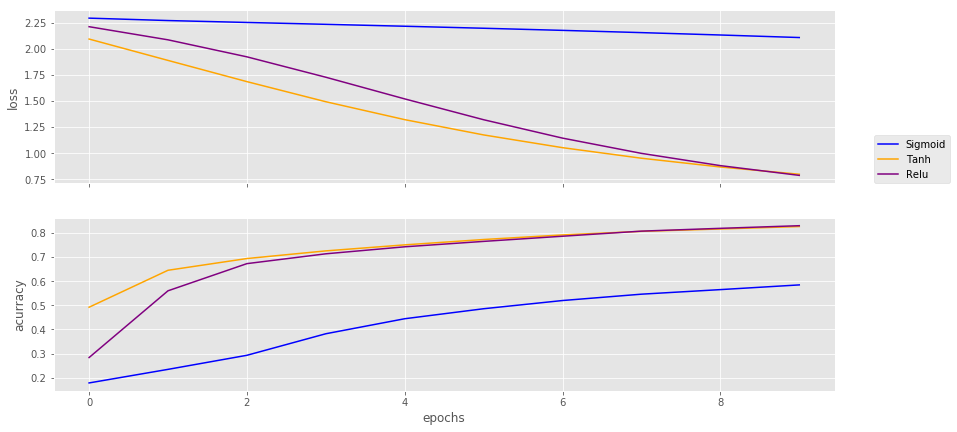

In [14]:
fig,ax=plt.subplots(2,1,sharex=True,figsize=(14,7))
ax[0].plot(loss_Sigmoid,color='blue',label= 'Sigmoid')
ax[0].plot(loss_Tanh,color='orange',label= 'Tanh')
ax[0].plot(loss_Relu,color='purple',label= 'Relu')
ax[0].set( ylabel='loss')
ax[0].legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
ax[1].plot(accuracy_Sigmoid,color='blue',label='Sigmoid')
ax[1].plot(accuracy_Tanh,color='orange',label='Tanh')
ax[1].plot(accuracy_Relu,color='purple',label='Relu')
ax[1].set( ylabel='acurracy')
plt.xlabel('epochs')
plt.show()

* It's not convenient `Sigmoid` function.
* The best models: **first** `Tanh` and **then** `Relu`.